# [MLP Regression](https://github.com/kokchun/Deep-learning-AI21/blob/main/Lectures/Lec0-MLP_regression.ipynb)

In [2]:
import seaborn
import pandas
import matplotlib.pyplot as plt
import numpy

mpg_df = seaborn.load_dataset('mpg').drop('name', axis=1)
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [3]:
mpg_df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [4]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [6]:
mpg_df.query('horsepower.isna()') # Exercise: impute the values

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [9]:
mpg_dropna = mpg_df.dropna(axis=0)
mpg_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


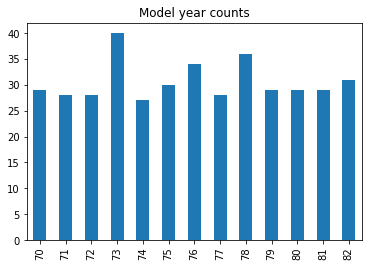

In [14]:
mpg_df['model_year'].value_counts().sort_index().plot(kind='bar', title='Model year counts');

In [17]:
bins = pandas.IntervalIndex.from_tuples([(69,73), (74,77), (78,82)])
mpg_dropna['model_year'] = pandas.cut(mpg_dropna['model_year'], bins=bins)
mpg_dropna

C:\Users\CreativeZone2\AppData\Local\Temp\ipykernel_7128\1139960193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_dropna['model_year'] = pandas.cut(mpg_dropna['model_year'], bins=bins)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,"(69, 73]",usa
1,15.0,8,350.0,165.0,3693,11.5,"(69, 73]",usa
2,18.0,8,318.0,150.0,3436,11.0,"(69, 73]",usa
3,16.0,8,304.0,150.0,3433,12.0,"(69, 73]",usa
4,17.0,8,302.0,140.0,3449,10.5,"(69, 73]",usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,"(78, 82]",usa
394,44.0,4,97.0,52.0,2130,24.6,"(78, 82]",europe
395,32.0,4,135.0,84.0,2295,11.6,"(78, 82]",usa
396,28.0,4,120.0,79.0,2625,18.6,"(78, 82]",usa


In [20]:
mpg_dummies = pandas.get_dummies(mpg_dropna, columns=['model_year', 'origin'], drop_first=True)
mpg_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(74, 77]","model_year_(78, 82]",origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,1


## Train|Test Split

In [28]:
X, y = mpg_dummies.drop(columns=['mpg']).values, mpg_dummies['mpg'].values # Keras and tensorflow needs arrays instead of dataframes

X, X.shape, type(y)

(array([[  8., 307., 130., ...,   0.,   0.,   1.],
        [  8., 350., 165., ...,   0.,   0.,   1.],
        [  8., 318., 150., ...,   0.,   0.,   1.],
        ...,
        [  4., 135.,  84., ...,   1.,   0.,   1.],
        [  4., 120.,  79., ...,   1.,   0.,   1.],
        [  4., 119.,  82., ...,   1.,   0.,   1.]]),
 (392, 9),
 numpy.ndarray)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((262, 9), (130, 9))

## Multiple linear regression

In [31]:
from sklearn.linear_model import LinearRegression

model_LinearRegression = LinearRegression()
model_LinearRegression.fit(scaled_X_train, y_train)

intercept, coefficients = model_LinearRegression.intercept_, model_LinearRegression.coef_

intercept, coefficients

(23.561068702290076,
 array([-0.11056921,  1.00558819, -1.74414263, -4.59937884,  0.00523216,
         0.33079024,  2.67355484,  0.0757955 , -1.25601116]))

## Artificial neural network (Shallow Multilinear Perception) (Shallow MLP)

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD

model_shallow = Sequential(name='shallow_network') # names cannot have spaces
model_shallow.add(InputLayer(X_train.shape[1])) # 274 features
# model_shallow.add(Dense(20, name='hidden_layer')) # create more hidden layers
model_shallow.add(Dense(1, name='output_layer')) # note no activation function --> linear activation (linear regression)
model_shallow.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=.01))
model_shallow.summary()

Model: "shallow_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output_layer (Dense)        (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_shallow.fit(scaled_X_train, y_train, epochs=50, verbose=1, validation_data=(scaled_X_test,y_test))

Epoch 1/50
9/9 [==============================] - 0s 14ms/step - loss: 523.7210 - val_loss: 381.9286
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 358.2169 - val_loss: 253.8134
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 248.5674 - val_loss: 174.1438
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 176.5197 - val_loss: 121.2651
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 126.5970 - val_loss: 84.9799
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 91.3355 - val_loss: 60.4202
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 66.9728 - val_loss: 43.9383
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 50.4733 - val_loss: 32.1740
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 38.5923 - val_loss: 24.6187
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 30.6990 - val_loss: 19.2382
Epoch 11/

In [38]:
model_shallow.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [41]:
loss_df = pandas.DataFrame(model_shallow.history.history)
loss_df.head()

,loss,val_loss
0,523.721008,381.928589
1,358.216888,253.813370
2,248.567398,174.143845
3,176.519699,121.265076
4,126.597031,84.979881


In [44]:
loss_df.index = range(1, len(loss_df)+1)
loss_df.head()

,loss,val_loss
1,523.721008,381.928589
2,358.216888,253.813370
3,248.567398,174.143845
4,176.519699,121.265076
5,126.597031,84.979881


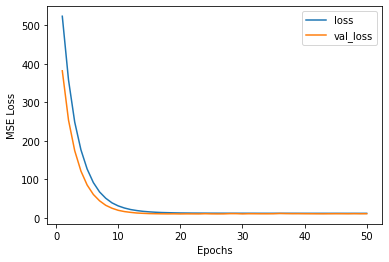

In [46]:
loss_df.plot(xlabel='Epochs', ylabel='MSE Loss');

In [48]:
model_shallow.layers[0]

In [50]:
weights, bias = model_shallow.layers[0].get_weights()

print(f'Linear regression sklearn: {intercept=}, {coefficients=}')
print(f'ANN: {bias=}, {weights=}')

Linear regression sklearn: intercept=23.561068702290076, coefficients=array([-0.11056921,  1.00558819, -1.74414263, -4.59937884,  0.00523216,
        0.33079024,  2.67355484,  0.0757955 , -1.25601116])
ANN: bias=array([23.5577], dtype=float32), weights=array([[-0.14640585],
       [-0.6112828 ],
       [-1.860948  ],
       [-3.1307852 ],
       [-0.3076101 ],
       [ 0.22847632],
       [ 2.6127725 ],
       [ 0.39727384],
       [-0.8751236 ]], dtype=float32)


## Prediction and evaluation

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_ANN = model_shallow.predict(scaled_X_test)
y_pred_LinearRegression = model_LinearRegression.predict(scaled_X_test)

print('MAE, RSME for ANN')
print(mean_absolute_error(y_test, y_pred_ANN), numpy.sqrt(mean_absolute_error(y_test, y_pred_ANN)))
print('\nMAE, RSME for Linear regression')
print(mean_absolute_error(y_test, y_pred_LinearRegression), numpy.sqrt(mean_absolute_error(y_test, y_pred_LinearRegression)))

MAE, RSME for ANN
2.5985633307236893 1.6120059958708868

MAE, RSME for Linear regression
2.603217481292956 1.6134489397848808
